<a href="https://colab.research.google.com/github/gowtham-dd/Data-Science-Basics/blob/main/ScikitLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [20]:
# fit () to make model learn
X,y= load_breast_cancer(return_X_y=True)

In [21]:
mod=KNeighborsRegressor().fit(X,y)

pipe=Pipeline([('scaler',StandardScaler()),('model',KNeighborsRegressor(n_neighbors=1))])
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

In [22]:
mod=GridSearchCV(estimator=pipe,param_grid={'model__n_neighbors':np.arange(1,10)},cv=5)

In [23]:
import pandas as pd
mod.fit(X,y)
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002539,0.001403,0.002396,0.000733,1,{'model__n_neighbors': 1},0.854220,0.785243,0.807432,0.861258,0.700265,0.801684,0.058135,9
1,0.001583,0.000030,0.001770,0.000029,2,{'model__n_neighbors': 2},0.854220,0.901570,0.788176,0.907505,0.737732,0.837841,0.065835,8
2,0.001608,0.000069,0.001720,0.000015,3,{'model__n_neighbors': 3},0.825874,0.892622,0.850225,0.912644,0.761322,0.848537,0.053247,6
3,0.001663,0.000110,0.001848,0.000142,4,{'model__n_neighbors': 4},0.797275,0.876962,0.870017,0.927738,0.809544,0.856307,0.047726,2
4,0.001572,0.000018,0.001860,0.000062,5,{'model__n_neighbors': 5},0.804655,0.872578,0.889081,0.907505,0.826154,0.859994,0.038650,1
5,0.001654,0.000103,0.001840,0.000043,6,{'model__n_neighbors': 6},0.776268,0.862794,0.888739,0.886951,0.854296,0.853809,0.041017,3
6,0.001617,0.000042,0.002107,0.000126,7,{'model__n_neighbors': 7},0.776867,0.854637,0.888389,0.881078,0.847074,0.849609,0.039541,4
7,0.001585,0.000019,0.001896,0.000009,8,{'model__n_neighbors': 8},0.764246,0.840610,0.882052,0.896666,0.857158,0.848146,0.046219,7
8,0.001649,0.000082,0.001965,0.000052,9,{'model__n_neighbors': 9},0.762433,0.840479,0.882558,0.911502,0.850133,0.849421,0.050199,5


In [24]:
pred=mod.predict(X)

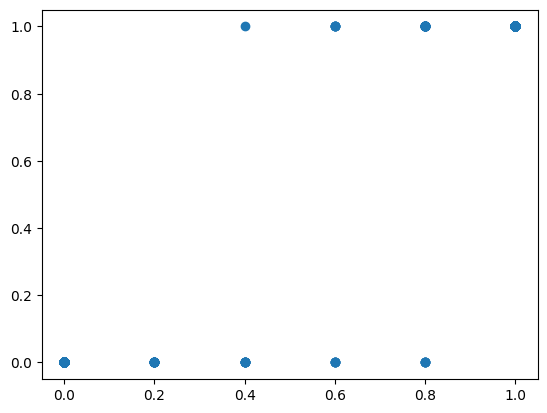

In [25]:
plt.scatter(pred,y)

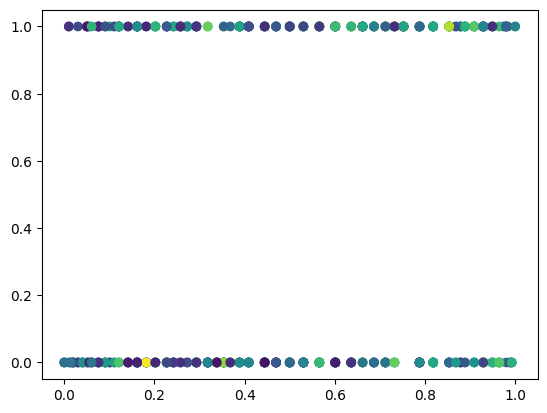

In [34]:
X,y= load_diabetes(return_X_y=True)
from sklearn.preprocessing import StandardScaler,QuantileTransformer
X_new=QuantileTransformer(n_quantiles=100).fit_transform(X)
plt.scatter(X_new[:,0],X_new[:,1],c=y)

## Example

In [35]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/creditcardfraud


In [39]:
df=pd.read_csv('/content/creditcard.csv')[:80000]

In [41]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [42]:
X=df.drop(columns=['Time','Amount','Class']).values
y=df['Class'].values
print(y.sum()) # 196 case in total 80,000

196


In [44]:
from sklearn.linear_model import LogisticRegression

mod=LogisticRegression(class_weight={0:1,1:2},max_iter=1000)
mod.fit(X,y).predict(X).sum()

np.int64(172)

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,recall_score,make_scorer

grid=GridSearchCV(estimator=LogisticRegression(),param_grid={'class_weight':[{0:1,1:v} for v in np.linspace(1,20,30)]},scoring={'precision':make_scorer(precision_score),'recall_score':make_scorer(recall_score)},refit='precision',
                  cv=10,n_jobs=-1)
grid.fit(X,y)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: np.float64(1.0)},
                                          {0: 1,
                                           1: np.float64(1.6551724137931034)},
                                          {0: 1,
                                           1: np.float64(2.310344827586207)},
                                          {0: 1,
                                           1: np.float64(2.9655172413793105)},
                                          {0: 1,
                                           1: np.float64(3.6206896551724137)},
                                          {0: 1,
                                           1: np.float64(4.275862068965517)},
                                          {0: 1,
                                           1: np.float64(4.931034482758621)},
                                          {0: 1,
                                           1:...
                                           1: np.float64(16.724137931034484)},
                                          {0: 1,
                                           1: np.float64(17.379310344827587)},
                                          {0: 1,
                                           1: np.float64(18.03448275862069)},
                                          {0: 1,
                                           1: np.float64(18.689655172413794)},
                                          {0: 1,
                                           1: np.float64(19.344827586206897)},
                                          {0: 1, 1: np.float64(20.0)}]},
             refit='precision',
             scoring={'precision': make_scorer(precision_score, response_method='predict'),
                      'recall_score': make_scorer(recall_score, response_method='predict')})

In [54]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,split5_test_precision,split6_test_precision,split7_test_precision,split8_test_precision,split9_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,split3_test_recall_score,split4_test_recall_score,split5_test_recall_score,split6_test_recall_score,split7_test_recall_score,split8_test_recall_score,split9_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score
0,0.327022,0.043605,0.009700,0.001591,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",1.000000,0.463415,0.583333,1.000000,1.000000,0.944444,1.0,0.818182,0.0,1.000000,0.780937,0.319029,29,0.368421,1.0,0.736842,0.473684,0.35,0.85,0.90,0.45,0.00,0.40,0.552895,0.293874,30
1,0.324578,0.046123,0.008983,0.000638,"{0: 1, 1: 1.6551724137931034}","{'class_weight': {0: 1, 1: 1.6551724137931034}}",1.000000,0.441860,0.583333,1.000000,1.000000,0.944444,1.0,0.833333,1.0,1.000000,0.880297,0.193056,1,0.421053,1.0,0.736842,0.789474,0.35,0.85,0.95,0.50,0.25,0.55,0.639737,0.247661,29
2,0.315940,0.024154,0.008904,0.000409,"{0: 1, 1: 2.310344827586207}","{'class_weight': {0: 1, 1: 2.310344827586207}}",1.000000,0.431818,0.583333,1.000000,1.000000,0.944444,1.0,0.833333,1.0,1.000000,0.879293,0.195347,2,0.421053,1.0,0.736842,0.842105,0.40,0.85,0.95,0.50,0.25,0.60,0.655000,0.244257,28
3,0.318243,0.029138,0.008983,0.000804,"{0: 1, 1: 2.9655172413793105}","{'class_weight': {0: 1, 1: 2.9655172413793105}}",1.000000,0.431818,0.583333,1.000000,1.000000,0.944444,1.0,0.833333,1.0,0.933333,0.872626,0.192226,4,0.631579,1.0,0.736842,0.842105,0.40,0.85,0.95,0.50,0.25,0.70,0.686053,0.230605,27
4,0.388510,0.126844,0.012613,0.005636,"{0: 1, 1: 3.6206896551724137}","{'class_weight': {0: 1, 1: 3.6206896551724137}}",1.000000,0.431818,0.583333,1.000000,1.000000,0.944444,1.0,0.833333,1.0,0.933333,0.872626,0.192226,4,0.789474,1.0,0.736842,0.894737,0.45,0.85,0.95,0.50,0.30,0.70,0.717105,0.219513,26
5,0.466352,0.086033,0.013318,0.007992,"{0: 1, 1: 4.275862068965517}","{'class_weight': {0: 1, 1: 4.275862068965517}}",1.000000,0.431818,0.583333,1.000000,1.000000,0.944444,1.0,0.833333,1.0,0.933333,0.872626,0.192226,4,0.894737,1.0,0.736842,0.894737,0.45,0.85,0.95,0.50,0.35,0.70,0.732632,0.215999,25
6,0.317479,0.034302,0.008933,0.000451,"{0: 1, 1: 4.931034482758621}","{'class_weight': {0: 1, 1: 4.931034482758621}}",1.000000,0.431818,0.583333,1.000000,1.000000,0.944444,1.0,0.846154,1.0,0.941176,0.874693,0.192260,3,0.894737,1.0,0.736842,0.894737,0.45,0.85,0.95,0.55,0.35,0.80,0.747632,0.211427,24
7,0.320479,0.030032,0.008889,0.000433,"{0: 1, 1: 5.586206896551724}","{'class_weight': {0: 1, 1: 5.586206896551724}}",1.000000,0.431818,0.583333,1.000000,1.000000,0.894737,1.0,0.857143,1.0,0.941176,0.870821,0.190923,7,0.894737,1.0,0.736842,0.947368,0.50,0.85,1.00,0.60,0.35,0.80,0.767895,0.209612,23
8,0.320663,0.022779,0.008798,0.000415,"{0: 1, 1: 6.241379310344827}","{'class_weight': {0: 1, 1: 6.241379310344827}}",1.000000,0.422222,0.583333,0.947368,1.000000,0.894737,1.0,0.875000,1.0,0.941176,0.866384,0.190221,8,0.894737,1.0,0.736842,0.947368,0.50,0.85,1.00,0.70,0.45,0.80,0.787895,0.183907,22
9,0.314140,0.025697,0.008828,0.000414,"{0: 1, 1: 6.896551724137931}","{'class_weight': {0: 1, 1: 6.896551724137931}}",0.944444,0.422222,0.583333,0.947368,1.000000,0.894737,1.0,0.875000,1.0,0.941176,0.860828,0.187022,9,0.894737,1.0,0.736842,0.947368,0.50,0.85,1.00,0.70,0.50,0.80,0.792895,0.175122,21


In [48]:
from sklearn.metrics import precision_score,recall_score

recall_score(y,grid.predict(X))

0.6020408163265306